In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=b794786bf603bc22f764667c3607316a27b8244f93d6904ad71c60ad2eb04d22
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from time import time

In [2]:
col_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Y']
# load datasetSex
data = pd.read_csv("iris_Y_new.csv", header=None, names=col_names)

In [3]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from tkinter import Y
feature_cols = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Y']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Y, Length: 150, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.shape

(112, 5)

In [7]:
def mode(a):
    counts = np.bincount(a)  
    return np.argmax(counts)

In [8]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

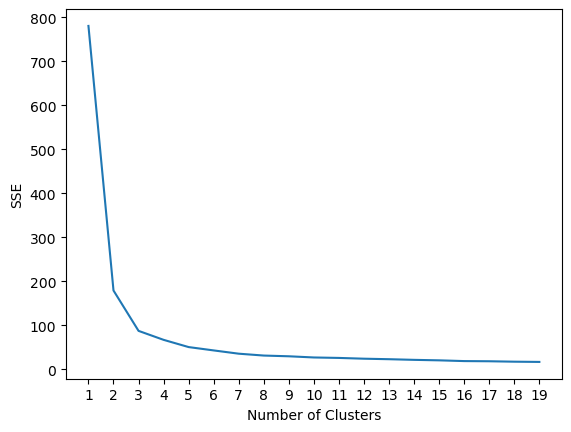

In [9]:
sse= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Purity: 0.96
done in 0.05086398124694824 seconds
分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


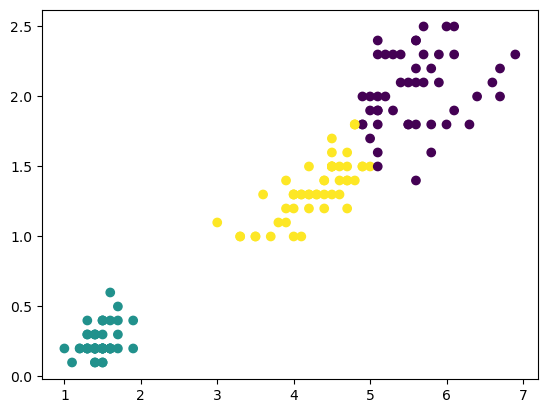

In [10]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
X = iris.data
X=X[:,2:4]

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(X)
t= time()
kmeans_fit.fit_predict(X)
c=kmeans_fit.fit_predict(X)
purity = purity_score(y,c)
print('Purity:', purity)
print("done in {0} seconds".format(time() - t))

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)


plt.scatter(X[:,0],X[:,1],c=kmeans_fit.predict(X))

In [11]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)


0.5528190123564095


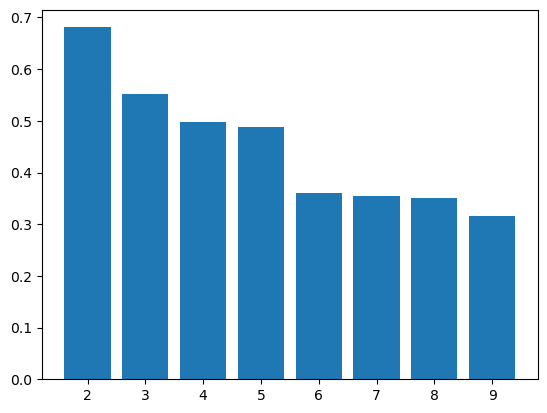

[0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566, 0.3599431166074401, 0.354396447858865, 0.3500602959686737, 0.31508974327805767]


In [12]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 10)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)